Epoch 1/500
19/19 [==============================] - 1s 3ms/step - loss: 0.0325
Epoch 2/500
19/19 [==============================] - 0s 2ms/step - loss: 0.0271
Epoch 3/500
19/19 [==============================] - 0s 2ms/step - loss: 0.0256
Epoch 4/500
19/19 [==============================] - 0s 2ms/step - loss: 0.0241
Epoch 5/500
19/19 [==============================] - 0s 2ms/step - loss: 0.0234
Epoch 6/500
19/19 [==============================] - 0s 2ms/step - loss: 0.0219
Epoch 7/500
19/19 [==============================] - 0s 2ms/step - loss: 0.0204
Epoch 8/500
19/19 [==============================] - 0s 2ms/step - loss: 0.0197
Epoch 9/500
19/19 [==============================] - 0s 2ms/step - loss: 0.0192
Epoch 10/500
19/19 [==============================] - 0s 2ms/step - loss: 0.0183
Epoch 11/500
19/19 [==============================] - 0s 2ms/step - loss: 0.0179
Epoch 12/500
19/19 [==============================] - 0s 2ms/step - loss: 0.0170
Epoch 13/500
19/19 [=================

Text(0.5, 0, 'day')

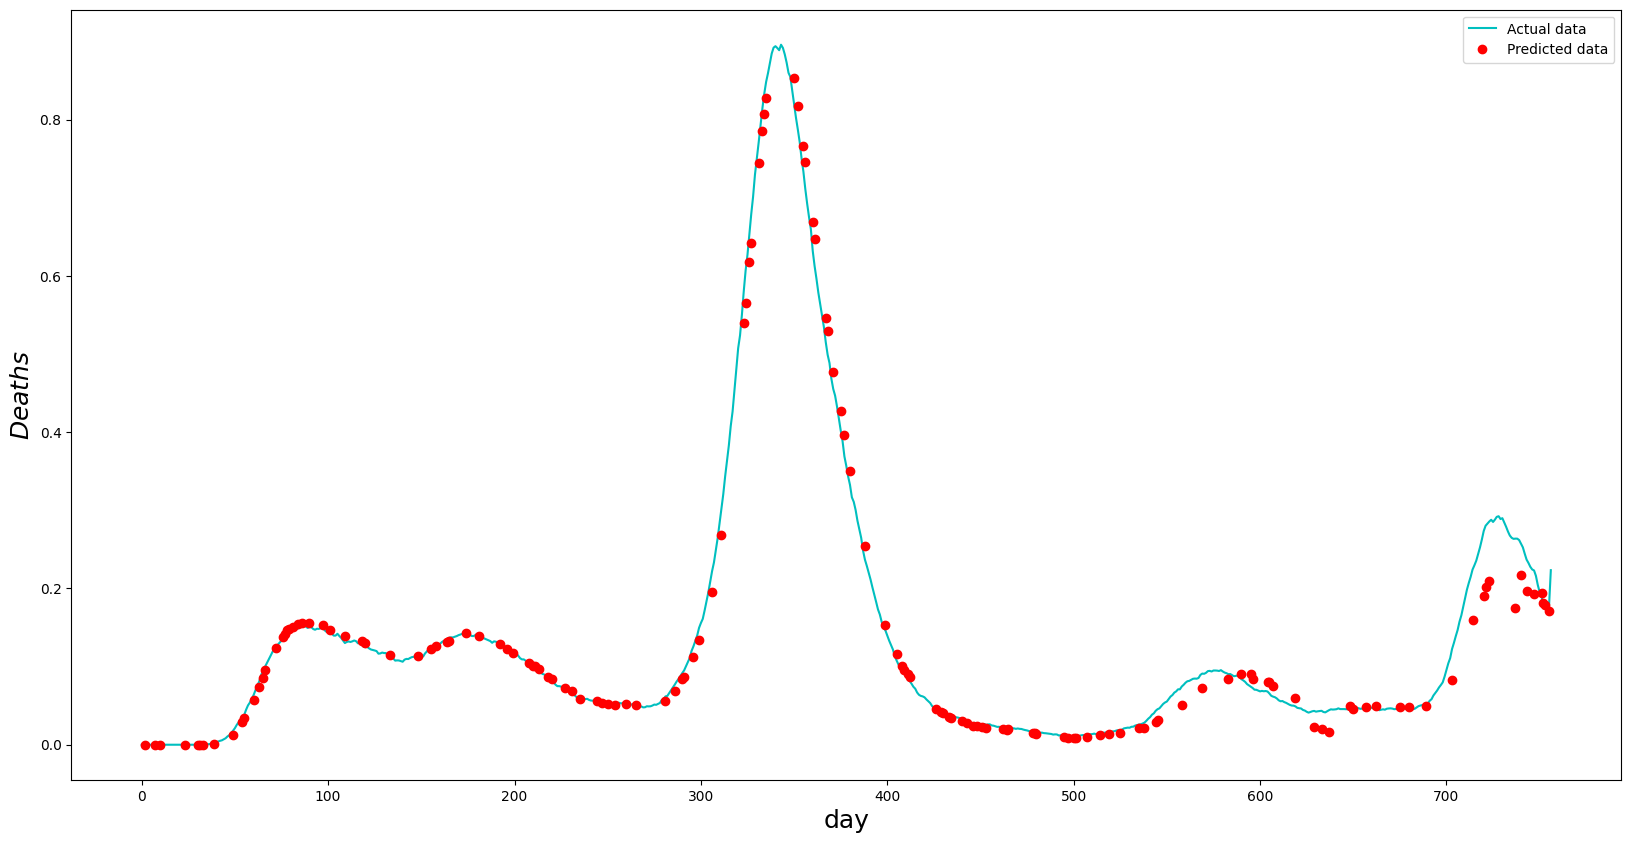

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras import layers

# Import file
data = pd.read_csv('All_data.csv')

# Separate features and tags
features = data[['pm10', 'pm25', 'Cday']]
labels = data['deaths']

# Divide the data into training and test data
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Data scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Building a neural network model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[3]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Model training
model.fit(X_train_scaled, y_train, epochs=500, batch_size=32, verbose=1)

# Model evaluation on test data
loss = model.evaluate(X_test_scaled, y_test, verbose=0)
print('Mean Squared Error (MSE) on test data:', loss)

# Plot prediction and real data
y = data['Norm_D']
plt.figure(figsize=(20, 10))
plt.plot(y.index, y, 'c-')
plt.plot(X_test.index, y_test, 'ro')
plt.legend(['Actual data', 'Predicted data'])
plt.ylabel("$Deaths$", fontsize=18)
plt.xlabel('day', fontsize=18)